# External Lab 

Here each question is of 1 mark.

# Multiple Linear Regression

## Problem Statement

Use Multiple Linear Regression to **predict the consumption of petrol** given relevant variables are the petrol tax, the per capita, income, the number of miles of paved highway, and the proportion of the population with driver's licenses.

## Dataset

There are 48 rows of data.  The data include:

      I,  the index;
      A1, the petrol tax;
      A2, the per capita income;
      A3, the number of miles of paved highway;
      A4, the proportion of drivers;
      B,  the consumption of petrol.

### Reference 

    Helmut Spaeth,
    Mathematical Algorithms for Linear Regression,
    Academic Press, 1991,
    ISBN 0-12-656460-4.

    S Weisberg,
    Applied Linear Regression,
    New York, 1980, pages 32-33.

## Question 1 - Exploratory Data Analysis

*Read the dataset given in file named **'petrol.csv'**. Check the statistical details of the dataset.*

**Hint:** You can use **df.describe()**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
petrol_df=pd.read_csv('petrol.csv')

In [2]:
petrol_df.describe()

,tax,income,highway,dl,consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


# Question 2 - Cap outliers 

Find the outliers and cap them. (Use (Q1 - 1.5 * IQR) as the minimum cap and (Q3 + 1.5 * IQR) as the max cap. The decision criteria is you should consider the datapoints which only falls within this range. The data points which fall outside this range are outliers and the entire row needs to be removed

In [3]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return (df_out)
petrol_df1 = remove_outlier(petrol_df,'tax')
petrol_df2 = remove_outlier(petrol_df1,'income')
petrol_df3 = remove_outlier(petrol_df2,'highway')
petrol_df4 = remove_outlier(petrol_df3,'dl')
petrol_df_capped = remove_outlier(petrol_df4,'consumption')

In [4]:
petrol_df.shape

(48, 5)

In [5]:
petrol_df1.shape

(46, 5)

In [6]:
petrol_df2.shape

(46, 5)

In [7]:
petrol_df3.shape

(45, 5)

In [8]:
petrol_df4.shape

(44, 5)

In [9]:
petrol_df_capped.shape

(42, 5)

Question 3 - Independent variables and collinearity 
Which attributes seems to have stronger association with the dependent variable consumption?

In [10]:
petrol_df_capped.corr()

,tax,income,highway,dl,consumption
tax,1.000000,-0.133841,-0.443926,-0.316342,-0.463247
income,-0.133841,1.000000,-0.076862,0.296002,-0.254464
highway,-0.443926,-0.076862,1.000000,0.133983,0.215182
dl,-0.316342,0.296002,0.133983,1.000000,0.549161
consumption,-0.463247,-0.254464,0.215182,0.549161,1.000000


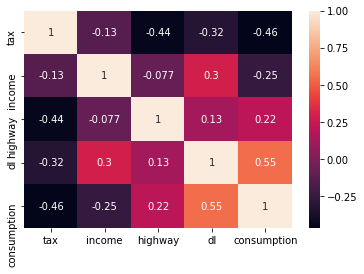

In [11]:
sns.heatmap(petrol_df_capped.corr(), annot=True)

In [12]:
# The proportion of drivers seems to be correlated, and tax seems to be negatively correlated

### Observing the above correlation values between all the variables, we can see that there is stronger association between the number of drivers and consumption. And comparatively tax has an association in a negative way. 
Insights :
As tax increases the consumption decreases.
As number of drivers is more consumption is more

# Question 4 - Transform the dataset 
Divide the data into feature(X) and target(Y) sets.

In [13]:
Y=petrol_df_capped['consumption']

In [14]:
X=petrol_df_capped[['tax','dl']]

# Question 5 - Split data into train, test sets 
Divide the data into training and test sets with 80-20 split using scikit-learn. Print the shapes of training and test feature sets.

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

In [16]:
print("X_train : ", X_train.shape)
print("X_test : ", X_test.shape)
print("Y_train : ", Y_train.shape)
print("Y_test : ", Y_test.shape)

X_train :  (33, 2)
X_test :  (9, 2)
Y_train :  (33,)
Y_test :  (9,)


# Question 6 - Build Model 
Estimate the coefficients for each input feature. Construct and display a dataframe with coefficients and X.columns as columns

In [17]:
regression_model = LinearRegression()
regression_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [18]:
intercept = regression_model.intercept_
print("The intercept for our model is {}".format(intercept))

The intercept for our model is 367.18022523608977


In [19]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[idx]))

The coefficient for tax is -30.519668340368703
The coefficient for dl is 765.6143372347805


B = 367.18022523608977 + 765.6143372347805*A4 - 30.519668340368703*A1
Where
B - (Consumption of Petrol)
A1 - (Tax)
A4 - (Drivers)

# R-Square 

# Question 7 - Evaluate the model 
Calculate the accuracy score for the above model.

In [20]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
Y_test_pred = regression_model.predict(X_test.values)
mse = mean_squared_error(Y_test, Y_test_pred)
print ("MSE: ", mse)
rmse = sqrt(mse)
print ("RMSE: ", rmse)
print ("r2: ",r2_score(Y_test,Y_test_pred))


MSE:  4850.311926165881
RMSE:  69.6441808492704
r2:  0.25294114041666727


# Question 8: Repeat the same Multi linear regression modelling by adding both Income and Highway features
Find R2 


In [21]:
Y1=petrol_df_capped['consumption']
X1=petrol_df_capped[['tax','dl','income','highway']]

In [22]:

X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.20, random_state=1)


In [23]:
model1=LinearRegression()
model1.fit(X1_train,Y1_train)
Y1_test_pred = model1.predict(X1_test.values)
mse1 = mean_squared_error(Y1_test, Y1_test_pred)
print ("MSE: ", mse1)
rmse1 = sqrt(mse1)
print ("RMSE: ", rmse1)
print ("r2: ",r2_score(Y1_test,Y1_test_pred))


MSE:  2678.7628722007153
RMSE:  51.75676643880214
r2:  0.5874093116352703


# Question 9: Print the coefficients of the multilinear regression model

In [24]:
model1.coef_.shape

(4,)

In [25]:
intercept1 = model1.intercept_
print("The intercept for our model is {}".format(intercept1))
for idx, col_name in enumerate(X1_train.columns):
    print("The coefficient for {} is {}".format(col_name, model1.coef_[idx]))

The intercept for our model is 622.2038670780593
The coefficient for tax is -41.80657617178468
The coefficient for dl is 980.3991843192081
The coefficient for income is -0.0655557142805992
The coefficient for highway is -0.003290289509586955


B = 622.203867078467 - 41.806576171788855*A1 - 0.06555571428061853*A2 - 0.003290289509621689*A3 + 980.3991843190109*A4
Where- 
A1, the petrol tax;
A2, the per capita income;
A3, the number of miles of paved highway;
A4, the proportion of drivers;
B,  the consumption of petrol.

# Question 10 
In one or two sentences give reasoning on R-Square on the basis of above findings
Answer

### *R squared value increase if we increase the number of independent variables to our analysis

Rsquare increases as the model is more refined by the increased number of independent variables and their interaction better predicts the dependent variable